In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# from paddleocr import PaddleOCR

In [2]:
import os
from PIL import Image
dir_path = '/kaggle/input/groundtruthtext'
train_path = dir_path + "/" + 'train/gt_text'

# Tr OCR Model

In [3]:
# !pip install transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from IPython.display import display


2025-06-04 03:53:11.507600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749009191.694931      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749009191.750119      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten") 
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 1024,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

def ocr_image(src_img):
    # img = Image.open(src_img).convert("RGB")
    pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [6]:
d = {}
test_cnt = 0
for folder in os.listdir(train_path):
    folder_path = train_path + "/" + folder
    print("Running Folder {}: ".format(test_cnt), folder)
    d[folder] = {}
    for file in os.listdir(folder_path):
        file_path = folder_path + "/" + file
        file_name = file.split(".")[0]        
        key = folder + "#" + file_name
        image = Image.open(file_path).convert("RGB")
        text = ocr_image(image)
        # text = pytesseract.image_to_string(image)
        d[folder][file_name] = text
    test_cnt += 1

    
df = pd.DataFrame.from_dict(d, orient='index')
df.to_csv("OCRRes.csv")

Running Folder 0:  VIT_819
Running Folder 19:  TCE_1276
{'VIT_819': {'nationality': 'Indian .', 'Dateofbirth': '05 ( 100 ( 1997 .', 'permanentaddress': '57/89 . Kaur slogan , Pond ,chevry -', 'experience': '3 Year at Svidhar-kohli .', 'date': '04 (23 ( 2022 .', 'presentaddress': 'H. Do. 2a , Bajwa , Mwyaffear Nagay', 'gender': 'Female', 'bloodgroup': '0 #', 'experience1': '6 Year at Paris LLC .', 'qualification': '12th Pass .', 'languageknown': 'Tamil , English , Hindi', 'referencescmob2': 'Eka Sekhon - 726359 8282 .', 'pancard': 'KLUW.P 3565F.', 'maritalstatus': 'married .', 'contactnumber': '74419 598 33 .', 'AlternateNo': '9 7602 60 995', 'place': 'Kavaratti .', 'candidatename': 'E"sha M.B.va.', 'referencescmob1': 'Arvinisms Nagy , 933 5245 979 .'}, 'TCE_1276': {'nationality': 'Indian', 'Dateofbirth': '8/20 ( 1959', 'permanentaddress': '3xful , Rural Gang , Purbhani -831952 .', 'experience': 'I year at Ravi Ltd .', 'date': '0911572023 .', 'presentaddress': '83, Baley Mary , Amaravat

In [37]:
# file_path = '/kaggle/input/groundtruthtext/train/gt_text/VIT_819/permanentaddress.jpg'
# image = Image.open(file_path)#.convert("RGB")
# # crop_image = image.crop((670,0,1400,200))
# # pixel_values = processor(images=crop_image, return_tensors="pt").pixel_values
# text = ocr_image(line1)
# print(text)

57/89 . Kaur Nagar , Pondicherry -


In [27]:
# import cv2
# import numpy as np
# def split_two_lines(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)

#     # Horizontal projection
#     hist = np.sum(binary, axis=1)

#     # Find split line based on histogram valley
#     line_index = np.argmin(hist[len(hist)//3:2*len(hist)//3]) + len(hist)//3

#     # Visualize if needed
#     # plt.plot(hist); plt.axvline(line_index, color='r'); plt.show()

#     line1 = image[:line_index, :]
#     line2 = image[line_index:, :]

#     return line1, line2


In [49]:
# from scipy.signal import find_peaks

# def count_text_lines(image):
#     # Convert to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Binarize and invert (text becomes white)
#     _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#     # Compute horizontal projection profile
#     projection = np.sum(binary, axis=1)

#     # Smooth projection to reduce noise
#     # smoothed = cv2.GaussianBlur(projection, (5, 5), 0)

#     # Find peaks (lines) with prominence threshold
#     peaks, _ = find_peaks(projection, prominence=np.max(projection) * 0.3, distance=10)

#     # Optional: visualize projection
#     # plt.plot(smoothed)
#     # plt.scatter(peaks, smoothed[peaks], color='red')
#     # plt.title("Horizontal Projection Profile")
#     # plt.show()
#     threshold = np.max(projection) * 0.5
#     is_text_line = projection > threshold
    
#     # Count connected components (text lines)
#     from scipy.ndimage import label
    
#     labels, num_lines = label(is_text_line)
#     print("Estimated number of lines:", num_lines)
#     return len(peaks), peaks, projection

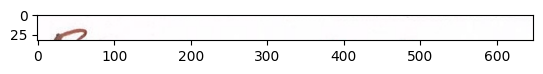

In [52]:
# file_path = '/kaggle/input/groundtruthtext/train/gt_text/VIT_819/candidatename.jpg'
# image = cv2.imread(file_path)
# # num_lines, line_peaks, pro = count_text_lines(image)
# line1, line2 = split_two_lines(image)
# plt.imshow(line1)